In [7]:
library(readxl)
library(dplyr)
library(ggplot2)

customer_r <- read_excel("r_practice/customer_r.xlsx")
reservation_r <- read_excel("r_practice/reservation_r.xlsx")
order_info_r <- read_excel("r_practice/order_info_r.xlsx")
item_r <- read_excel("r_practice/item_r.xlsx")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [5]:
my_first_cook <- order_info_r %>% 
mutate(reserv_month=substr(RESERV_NO,1,6)) %>% 
group_by(ITEM_ID,reserv_month) %>% 
summarise(avg_sales=mean(SALES)) %>% 
arrange(ITEM_ID,reserv_month)

`summarise()` has grouped output by 'ITEM_ID'. You can override using the `.groups` argument.


In [4]:
head(order_info_r)

ORDER_NO,ITEM_ID,RESERV_NO,QUANTITY,SALES
191228137840110010,M0003,2019122805,1,17000
191228137837810010,M0001,2019122806,10,240000
191228547385810010,M0003,2019122807,2,34000
191228567831310010,M0008,2019122808,1,10000
191228567430310010,M0005,2019122809,4,140000
191228137860010010,M0005,2019122810,2,70000


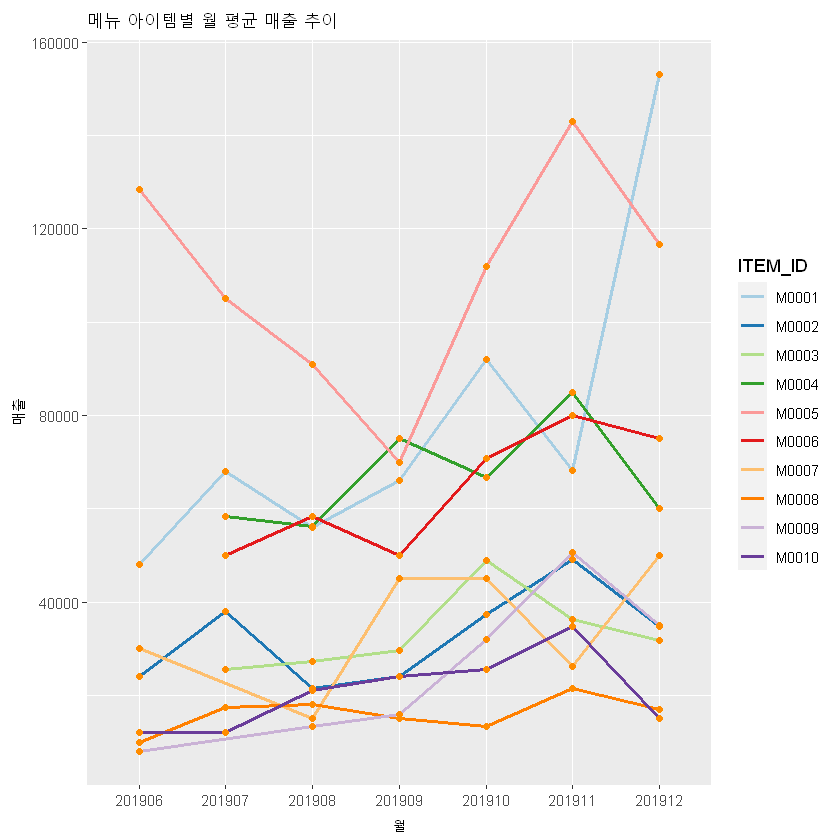

In [8]:
ggplot(my_first_cook,aes(x=reserv_month,y=avg_sales,group=ITEM_ID,color=ITEM_ID))+
geom_line(size=1)+
geom_point(color="darkorange",size=1.5)+
scale_color_brewer(palette="Paired")+
labs(title="메뉴 아이템별 월 평균 매출 추이",x="월",y="매출")

In [9]:
weight <- c(74,66,61,59,70)

mean(weight) # 평균 : 모든 요소의 값의 총합을 요소의 수만큼 나눈 것

[1] 66

In [10]:
median(weight) # 중앙값 : 모든 요소의 정중앙값

[1] 66

In [11]:
var(weight) # 분산 : 각 요소와 평균의 차이를 제곱한 것

[1] 38.5

In [12]:
sd(weight) # 표준편차 : 분산을 루트화한 것 - 클수록 값들이 퍼져있음

[1] 6.204837

In [14]:
table(reservation_r$BRANCH)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [15]:
no_cancel_data <- reservation_r %>% filter(CANCEL=="N")
table(no_cancel_data$BRANCH)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [17]:
df_f_join_1 <- inner_join(reservation_r,order_info_r,by="RESERV_NO")
df_f_join_2 <- inner_join(df_f_join_1,item_r,by="ITEM_ID")
head(df_f_join_2)

RESERV_NO,RESERV_DATE,RESERV_TIME,CUSTOMER_ID,BRANCH,VISITOR_CNT,CANCEL,ORDER_NO,ITEM_ID,QUANTITY,SALES,PRODUCT_NAME,PRODUCT_DESC,CATEGORY_ID,PRICE
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


In [19]:
df_branch_sales <- df_f_join_2 %>% 
filter(BRANCH=="강남"|BRANCH=="마포"|BRANCH=="서초") %>% 
group_by(BRANCH,PRODUCT_NAME) %>% 
summarise(sales_amt=sum(SALES)/1000)
df_branch_sales

`summarise()` has grouped output by 'BRANCH'. You can override using the `.groups` argument.


BRANCH,PRODUCT_NAME,sales_amt
강남,JUICE,66
강남,PASTA,180
강남,PIZZA,204
강남,SALAD,105
강남,SALAD_BAR,200
강남,SANDWICH,20
강남,SEA_FOOD,250
강남,SPECIAL_SET,1416
강남,STEAK,1505
강남,WINE,128
